# Ookla Internet Connectivity Analysis

> The data used for this analysis includes:

1. **Ookla Data**  
   - **Source:** [Ookla Data](https://www.ookla.com/)  
   - **Description:** The Ookla Open Data provides high-resolution, crowd-sourced internet speed and latency measurements from mobile and fixed networks. It enables analysis of connectivity performance, coverage, and quality across regions, supporting data-driven assessments of digital infrastructure.  
   - **Temporal Coverage:** We use data from 2019 to 2025  

2. **WorldPop Data**  
   - **Source:** [WorldPop Population Data](https://www.worldpop.org/)  
   - **Description:** The WorldPop dataset provides high-resolution (100 m) gridded population estimates derived from census, survey, and satellite data. It offers spatially detailed insights into population distribution, enabling analysis of demographic patterns, accessibility, and development indicators.  
   - **Temporal Coverage:** We use data from 2019 to 2025


In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

## Mobile and Fixed Network Comparison

The initial analysis focuses on mobile networks. Fixed broadband (fibre, DSL, cable) requires physical cabling to homes and buildings, offering higher theoretical speeds but demanding extensive infrastructure deployment that is mainly feasible in urban areas. Mobile broadband, by contrast, transmits data wirelessly via cell towers, enabling far wider geographic coverage at lower infrastructure costs. In Algeria, 50.65 million cellular mobile connections were active in early 2024 (110.2% of the population), while internet penetration stood at 72.9%, driven predominantly by mobile access (Kemp, 2024). Fixed broadband penetration reached about 12 subscriptions per 100 people in 2023, with coverage largely concentrated in urban and built-up areas (Kaczmarek, 2025). Therefore, for an initial national connectivity assessment, mobile data provides the most comprehensive picture of digital access across all 48 wilayas, reflecting how most Algerians connect to the internet and representing the country’s primary digital infrastructure backbone during this development phase.

## Data Pre-processing

We apply several filtering and aggregation steps to extract mobile network performance metrics from Ookla Speedtest data for Algeria (2019–2025):

### Spatial Filtering

- **Quadkey Generation:** Generate zoom-16 quadkeys (Ookla's native resolution ~95 m) for tiles whose centroids fall within Algeria's boundary, creating a pre-filtered set for efficient data loading.

- **Geographic Filtering:** Raw quarterly data is filtered using the pre-computed quadkey set or bounding box coordinates to retain only Algeria-relevant tiles.

### Aggregation

Filtered tiles are converted to polygons and aggregated using spatial intersection to compute download speed (Mbps), upload speed (Mbps), and latency (ms) across multiple levels:

- **National:** Country-level quarterly means, medians, and test-weighted averages  
- **Subnational:** ADM1 (wilayas), ADM2 (districts), and ADM3 (communes)  
- **Grid:** Zoom-12 (~1.5 km) and zoom-16 (~95 m) tiles for spatial mapping

# Annual Trends (Downlaod and Upload Speeds)

## Download Trends

In [21]:

import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook(hide_banner=True)
# Load and aggregate to YEAR
df = pd.read_csv("./processed_data/algeria_national_trends_mobile.csv").copy()
df['year'] = df['date'].str.slice(0, 4).astype(int)
yearly = (df.groupby('year', as_index=False)['avg_download_mbps']
            .mean().rename(columns={'avg_download_mbps':'download_mbps'}))
yearly = yearly.sort_values('year')

src = ColumnDataSource(yearly)

p = figure(title="Algeria – Yearly Download Speed (Mbps)",
           x_axis_type="linear", height=400, width=800,
           tools="pan,wheel_zoom,box_zoom,reset,save")

p.line('year', 'download_mbps', source=src, line_width=3)
p.scatter('year', 'download_mbps', source=src, size=8)

p.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Download (Mbps)", "@download_mbps{0.00}")],
                      mode='vline'))
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Download (Mbps)"

show(p)



## Upload Trends

In [22]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook(hide_banner=True)

df = pd.read_csv("processed_data/algeria_national_trends_mobile.csv").copy()
df['year'] = df['date'].str.slice(0, 4).astype(int)
yearly = (df.groupby('year', as_index=False)['avg_upload_mbps']
            .mean().rename(columns={'avg_upload_mbps':'upload_mbps'}))
yearly = yearly.sort_values('year')

src = ColumnDataSource(yearly)

p = figure(title="Algeria – Yearly Upload Speed (Mbps)",
           x_axis_type="linear", height=400, width=800,
           tools="pan,wheel_zoom,box_zoom,reset,save")

p.line('year', 'upload_mbps', source=src, line_width=3)
p.scatter('year', 'upload_mbps', source=src, size=8)

p.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Upload (Mbps)", "@upload_mbps{0.00}")],
                      mode='vline'))
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Upload (Mbps)"

show(p)


# Trends -  ADMN1

## Download -  ADMN1

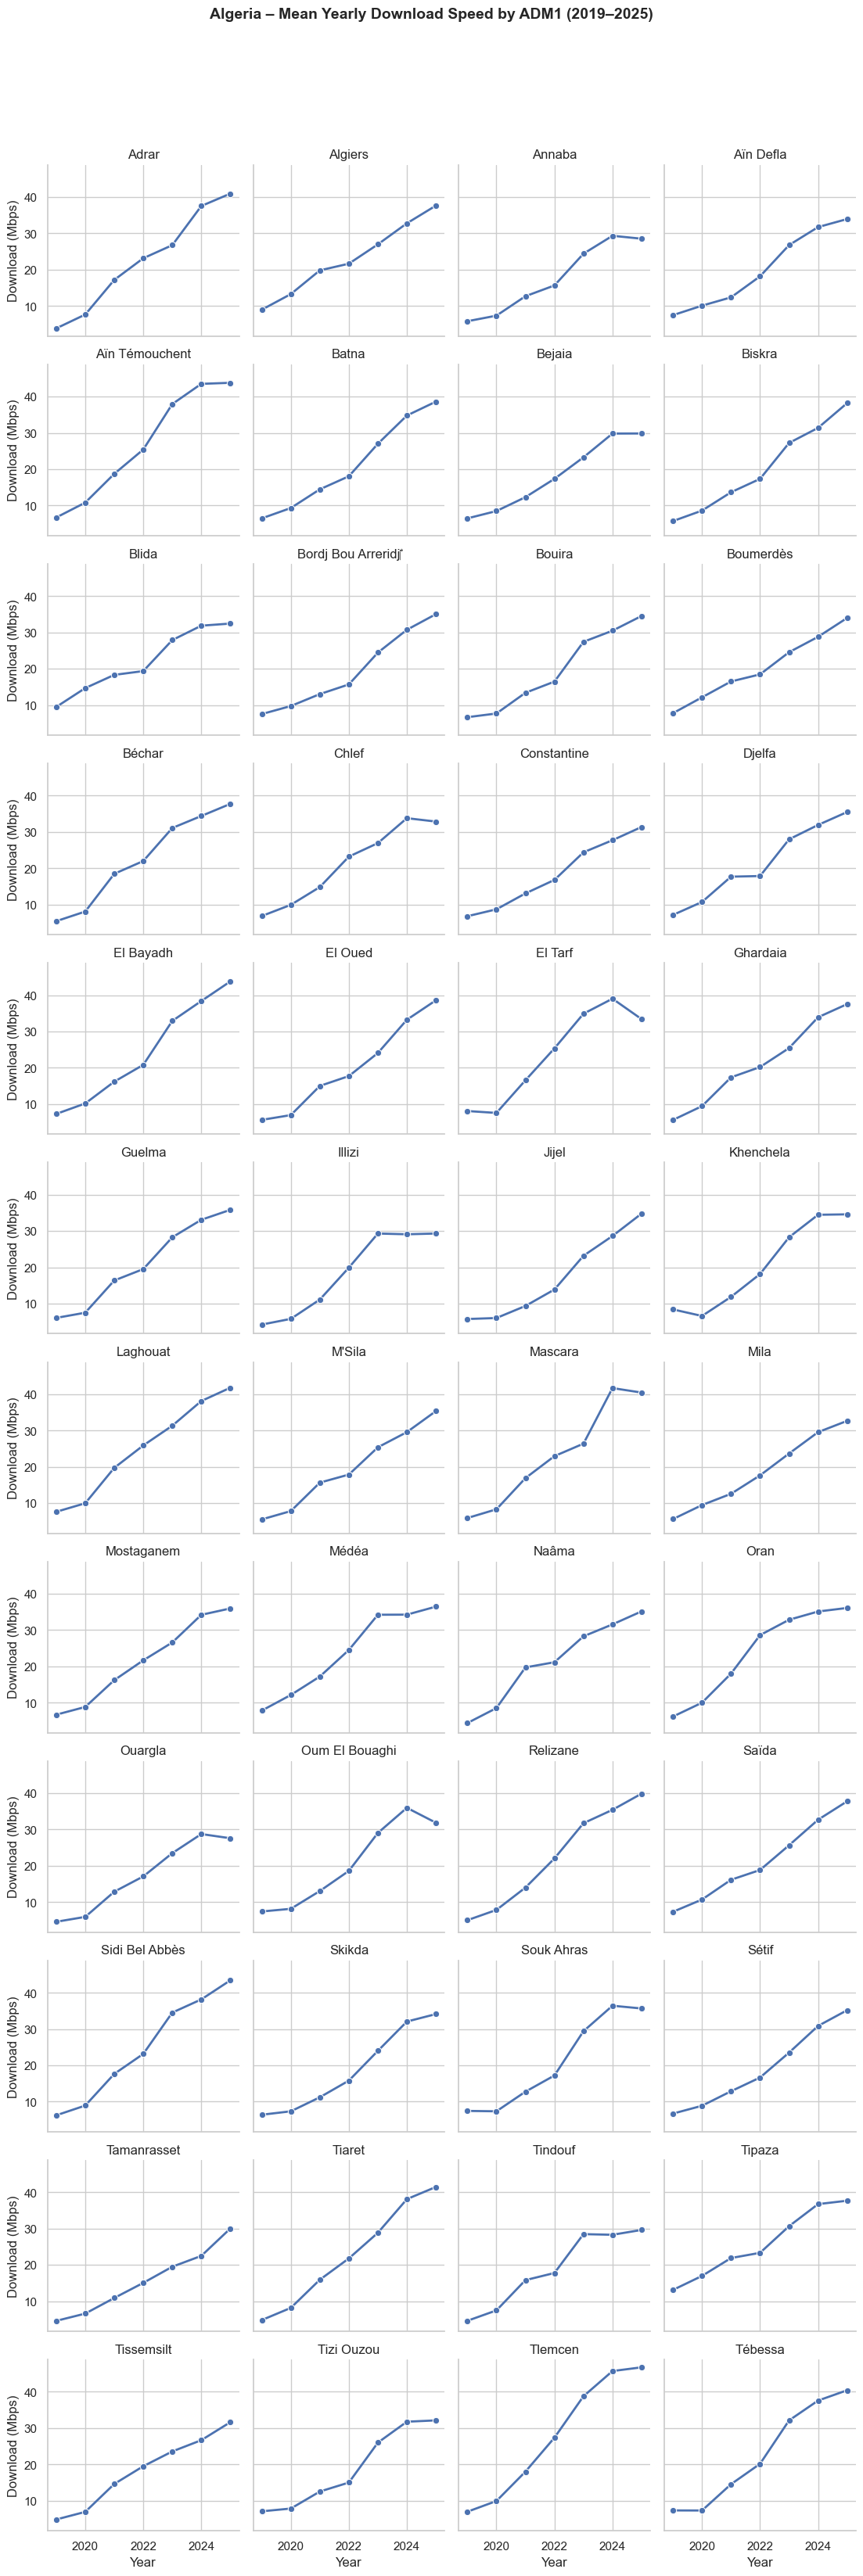

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load subnational data
df = pd.read_csv("processed_data/algeria_subnational_trends_mobile.csv")

# Keep ADM1 only and build yearly means
adm1 = df[df["admin_level"] == "ADM1"].copy()
adm1["year"] = adm1["date"].str.slice(0, 4).astype(int)
yearly = (adm1.groupby(["admin_name", "year"], as_index=False)["avg_download_mbps"]
               .mean()
               .rename(columns={"avg_download_mbps": "download_mbps"}))

# Faceted line charts
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(yearly.sort_values("admin_name"),
                  col="admin_name", col_wrap=4, height=2.8, sharey=True)
g.map_dataframe(sns.lineplot, x="year", y="download_mbps", marker="o", linewidth=2)
g.set_axis_labels("Year", "Download (Mbps)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Algeria – Mean Yearly Download Speed by ADM1 (2019–2025)", fontsize=14, weight="bold")
plt.show()


## Upload -  ADMN1

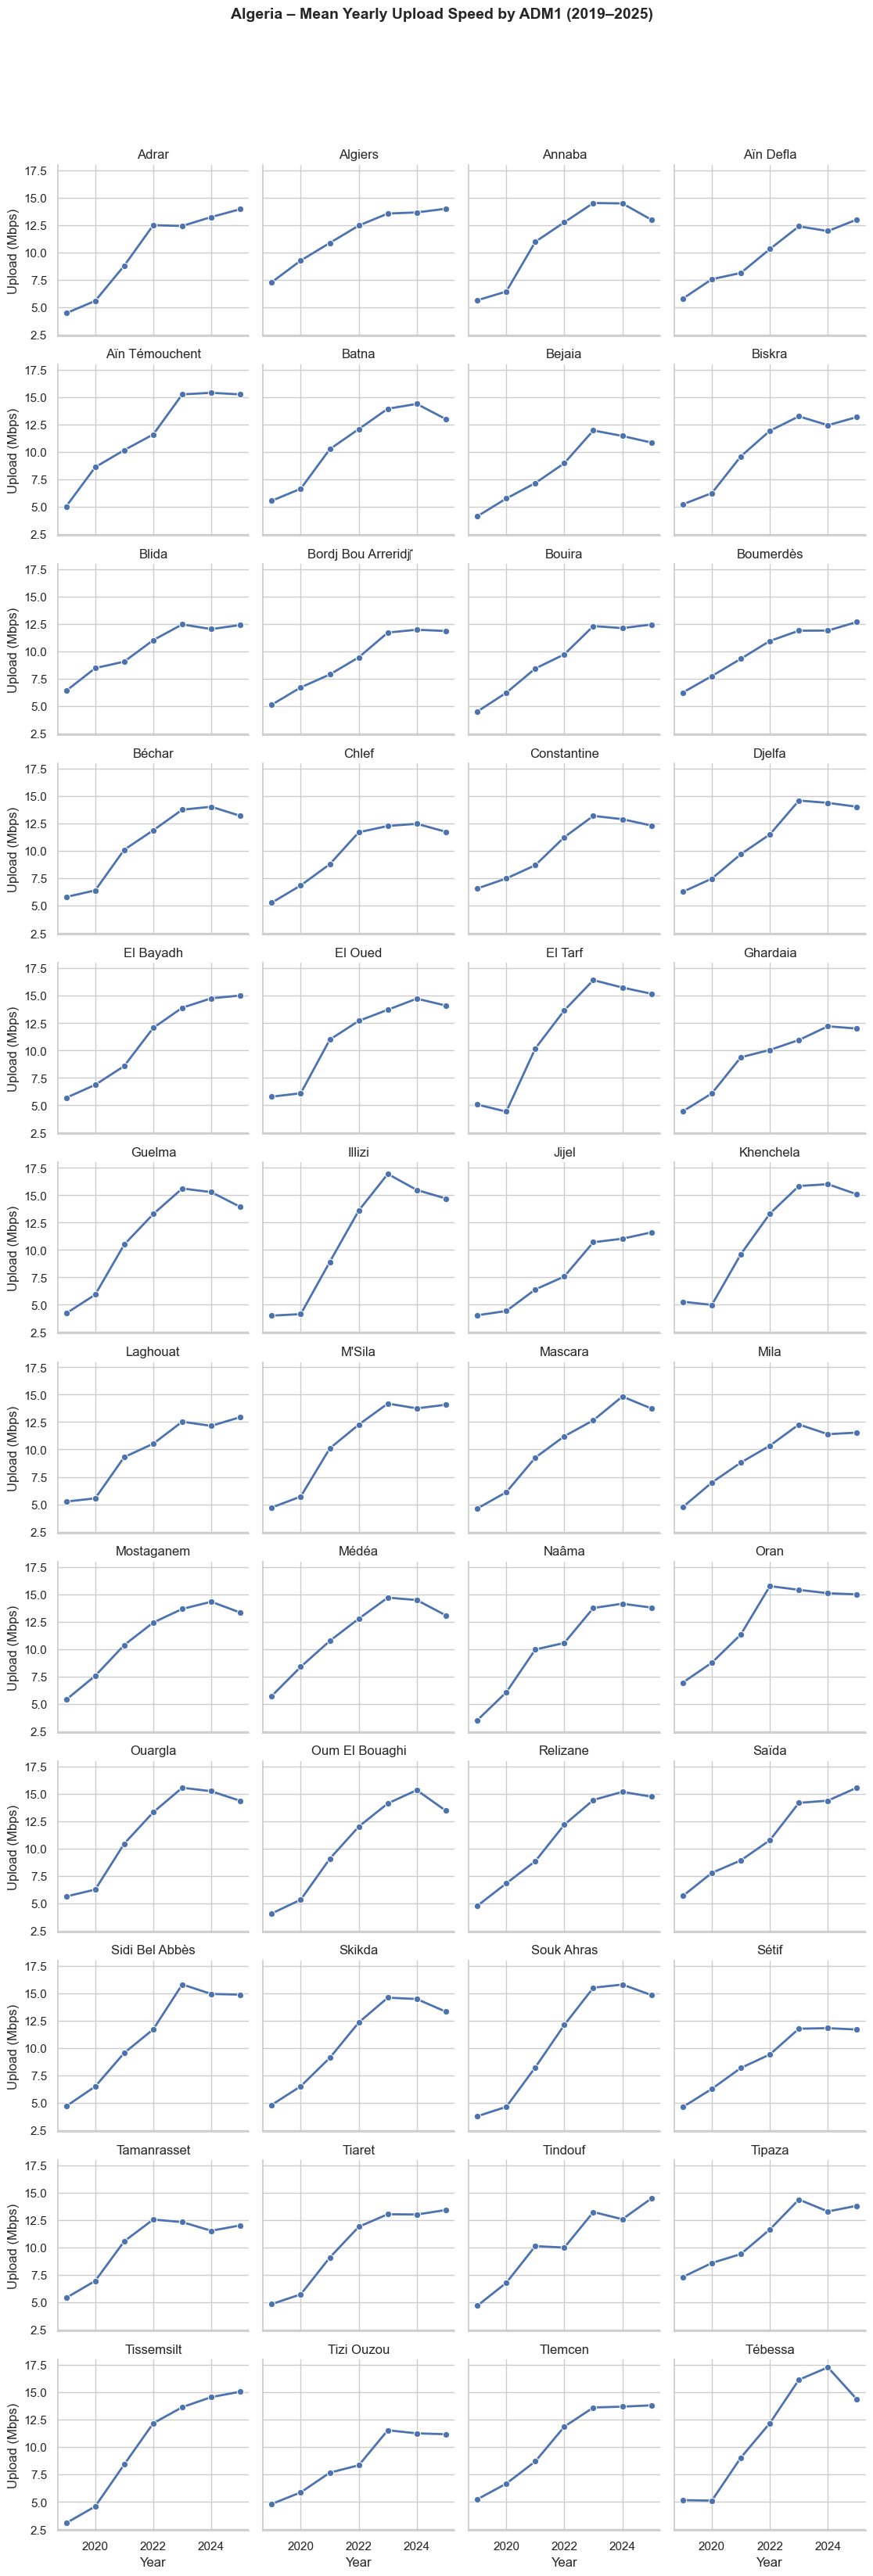

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load subnational data
df = pd.read_csv("processed_data/algeria_subnational_trends_mobile.csv")

# Keep ADM1 only and build yearly means
adm1 = df[df["admin_level"] == "ADM1"].copy()
adm1["year"] = adm1["date"].str.slice(0, 4).astype(int)
yearly = (adm1.groupby(["admin_name", "year"], as_index=False)["avg_upload_mbps"]
               .mean()
               .rename(columns={"avg_upload_mbps": "upload_mbps"}))

# Faceted line charts
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(yearly.sort_values("admin_name"),
                  col="admin_name", col_wrap=4, height=2.8, sharey=True)
g.map_dataframe(sns.lineplot, x="year", y="upload_mbps", marker="o", linewidth=2)
g.set_axis_labels("Year", "Upload (Mbps)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Algeria – Mean Yearly Upload Speed by ADM1 (2019–2025)", fontsize=14, weight="bold")
plt.show()


# Trends -  ADMN3

In [23]:
import pandas as pd

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, Select, CustomJS
from bokeh.plotting import figure
from bokeh.layouts import column

output_notebook(hide_banner=True)

# Read with a Unicode-friendly codec
df = pd.read_csv("processed_data/algeria_subnational_trends_mobile.csv", encoding="utf-8-sig")

# Filter ADM3 and build year correctly
adm3 = df[df["admin_level"] == "ADM3"].copy()
adm3["year"] = adm3["date"].astype(str).str.slice(0, 4).astype(int)

# Clean and filter commune names
adm3["admin_name"] = adm3["admin_name"].astype(str).str.strip()
valid_names = (
    adm3["admin_name"].notna()
    & (adm3["admin_name"] != "")
    & ~adm3["admin_name"].str.contains(r"\?")
    & adm3["admin_name"].str.match(r"^[A-Za-zÀ-ÿ'\-\s]+$")
)
adm3 = adm3[valid_names]

# Yearly mean per commune
yearly = (
    adm3.groupby(["admin_name", "year"], as_index=False)
        .agg(
            download=("avg_download_mbps", "mean"),
            upload=("avg_upload_mbps", "mean")
        )
)

# Build clean option list
wilayas = sorted(yearly["admin_name"].unique().tolist())
default_w = wilayas[0]

# JS-serialisable map: commune -> arrays
data_map = {
    w: {
        "year": yearly.loc[yearly.admin_name.eq(w), "year"].tolist(),
        "download": yearly.loc[yearly.admin_name.eq(w), "download"].tolist(),
        "upload": yearly.loc[yearly.admin_name.eq(w), "upload"].tolist(),
    }
    for w in wilayas
}

src = ColumnDataSource(data=data_map[default_w])

p = figure(
    height=420,
    width=820,
    title=f"Yearly Speed – {default_w}",
    x_axis_label="Year",
    y_axis_label="Mbps",
    tools="pan,wheel_zoom,box_zoom,reset,save,hover",
    toolbar_location="right"
)

p.line("year", "download", source=src, line_width=3, legend_label="Download", line_color="steelblue")
p.scatter("year", "download", source=src, size=7, color="steelblue")
p.line("year", "upload",   source=src, line_width=3, legend_label="Upload",   line_color="orange")
p.scatter("year", "upload", source=src, size=7, color="orange")

p.legend.click_policy = "hide"
p.select_one(HoverTool).tooltips = [
    ("Year", "@year"),
    ("Download", "@download{0.00}"),
    ("Upload", "@upload{0.00}")
]

selector = Select(title="Commune (ADM3):", value=default_w, options=wilayas)

selector.js_on_change(
    "value",
    CustomJS(args=dict(src=src, dataMap=data_map, fig=p), code="""
        const w = cb_obj.value;
        const d = dataMap[w];
        src.data = {year: d.year, download: d.download, upload: d.upload};
        src.change.emit();
        fig.title.text = `Yearly Speed – ${w}`;
    """)
)

show(column(selector, p))


The figures below show maps at admin level 3 between 2019 and 2025. You can filter to view trends in download, upload and latency.


In [25]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models import (
    GeoJSONDataSource, LinearColorMapper, ColorBar, FixedTicker, HoverTool, Div
)
from bokeh.palettes import brewer

output_notebook(hide_banner=True)

# CONFIG

ADM3_GEO = "./geoBoundaries-DZA-ADM3.geojson"
SUBNAT_CSV = "./processed_data/algeria_subnational_trends_mobile.csv"
YEARS = list(range(2019, 2025 + 1))

METRIC_COLUMNS = {
    "Download (Mbps)": "avg_download_mbps",
    "Upload (Mbps)":   "avg_upload_mbps",
    "Latency (ms)":    "avg_latency_ms",
}


# LOAD / PREP GEOMETRY (simplified)

g_adm3 = gpd.read_file(ADM3_GEO)[["shapeName", "geometry"]].rename(
    columns={"shapeName": "admin_name"}
).to_crs(4326)

g_adm3["geometry"] = g_adm3.geometry.simplify(tolerance=0.01, preserve_topology=True)

# LOAD / PREP DATA (wide with year-metric columns)

df = pd.read_csv(SUBNAT_CSV, encoding="utf-8")
df = df[df["admin_level"] == "ADM3"].copy()

if "year" not in df.columns and "date" in df.columns:
    df["year"] = df["date"].astype(str).str[:4].astype(int)

df = df[df["year"].between(min(YEARS), max(YEARS))]

yearly_data = df.groupby(["admin_name", "year"], as_index=False).agg({
    col: "median" for col in METRIC_COLUMNS.values() if col in df.columns
})
data_wide = yearly_data.pivot(index="admin_name", columns="year")

# Merge once with geometry and add all year columns
gdf_full = g_adm3.copy()
for metric_label, metric_col in METRIC_COLUMNS.items():
    if metric_col in df.columns:
        for y in YEARS:
            col_name = f"{metric_col}_{y}"
            if (metric_col, y) in data_wide.columns:
                year_data = data_wide[(metric_col, y)].reset_index()
                year_data.columns = ["admin_name", col_name]
                gdf_full = gdf_full.merge(year_data, on="admin_name", how="left")

# Single GeoJSON source for everything
source = GeoJSONDataSource(geojson=gdf_full.to_json())


# HELPERS

def _bivariate_palette():
    # 3x3 palette: rows = upload (low→high), cols = download (low→high)
    return [
        ["#e8e8e8", "#ace4e4", "#5ac8c8"],  # upload low
        ["#dfb0d6", "#a5add3", "#5698b9"],  # upload mid
        ["#be64ac", "#8c62aa", "#3b4994"],  # upload high
    ]

def _bin_series_to_tertiles_values(values):
    values = np.asarray(values, dtype=float)
    finite = values[np.isfinite(values)]
    if finite.size == 0:
        return [0.0, 1.0]
    return list(np.percentile(finite, [33.3333, 66.6667]))

def _bin_with_thresholds(series, q):
    def _b(v):
        if not np.isfinite(v): return np.nan
        return 0 if v <= q[0] else (1 if v <= q[1] else 2)
    return series.apply(_b).astype("Float64")

def _ensure_bivariate_columns(gdf, years, dl_col, ul_col):
    missing_any = any(f"{dl_col}_{y}" not in gdf.columns or f"{ul_col}_{y}" not in gdf.columns for y in years)
    if missing_any:
        raise ValueError("Download/Upload columns per year are missing.")

    # global distributions across all years
    dl_all, ul_all = [], []
    for y in years:
        if f"{dl_col}_{y}" in gdf.columns:
            dl_all.extend(gdf[f"{dl_col}_{y}"].values)
        if f"{ul_col}_{y}" in gdf.columns:
            ul_all.extend(gdf[f"{ul_col}_{y}"].values)

    dl_q = _bin_series_to_tertiles_values(dl_all)
    ul_q = _bin_series_to_tertiles_values(ul_all)
    palette = _bivariate_palette()

    # Per-year hex colour column
    for y in years:
        dcol = f"{dl_col}_{y}"
        ucol = f"{ul_col}_{y}"
        ccol = f"dl_ul_col_{y}"

        if dcol in gdf.columns and ucol in gdf.columns:
            d_bin = _bin_with_thresholds(gdf[dcol], dl_q)
            u_bin = _bin_with_thresholds(gdf[ucol], ul_q)

            colours = []
            for ub, db in zip(u_bin, d_bin):
                if pd.isna(ub) or pd.isna(db):
                    colours.append("#f0f0f0")
                else:
                    colours.append(palette[int(ub)][int(db)])
            gdf[ccol] = colours
        else:
            gdf[ccol] = "#f0f0f0"

    gdf["dl_q33"], gdf["dl_q66"] = dl_q[0], dl_q[1]
    gdf["ul_q33"], gdf["ul_q66"] = ul_q[0], ul_q[1]

# RENDER: Single combined view (Download + Upload) as bivariate + Latency

def render_bivariate_download_upload(years=YEARS):
    dl_label = "Download (Mbps)"
    ul_label = "Upload (Mbps)"
    dl_col = METRIC_COLUMNS[dl_label]
    ul_col = METRIC_COLUMNS[ul_label]

    if dl_col not in df.columns or ul_col not in df.columns:
        raise ValueError("Required columns for download/upload not found.")

    # Build bivariate colour columns and refresh source
    _ensure_bivariate_columns(gdf_full, years, dl_col, ul_col)
    source.geojson = gdf_full.to_json()

    show(Div(text=f"<h2 style='margin-bottom: 10px;'>Download vs Upload Speeds (2019-2025)</h2>"))

    figs = []
    for y in years:
        ccol = f"dl_ul_col_{y}"
        p = figure(
            title=str(y),
            width=300, height=300,
            tools="", toolbar_location=None
        )
        p.add_tools(HoverTool(tooltips=[
            ("Commune", "@admin_name"),
            (dl_label, f"@{dl_col}_{y}{{0.2f}}"),
            (ul_label, f"@{ul_col}_{y}{{0.2f}}"),
        ]))
        p.grid.visible = False
        p.axis.visible = False

        p.patches(
            xs="xs", ys="ys",
            source=source,
            fill_color=ccol,
            line_color="white",
            line_width=0.3,
            line_alpha=0.5
        )
        figs.append(p)

    # 3x3 legend
    legend = figure(width=300, height=300, toolbar_location=None,
                    title=f"{ul_label} ↑\n\n{dl_label} →")
    legend.grid.visible = False
    legend.axis.visible = False
    pal = _bivariate_palette()
    size = 1
    for i in range(3):          # upload bin
        for j in range(3):      # download bin
            legend.quad(left=j*size, right=(j+1)*size,
                        bottom=i*size, top=(i+1)*size,
                        fill_color=pal[i][j], line_color=None)
    figs.append(legend)

    grid = gridplot(figs, ncols=4, merge_tools=False, sizing_mode="scale_width")
    show(grid)

def render_latency(years=YEARS):
    metric_label = "Latency (ms)"
    metric_col = METRIC_COLUMNS[metric_label]
    if metric_col not in df.columns:
        raise ValueError(f"Column '{metric_col}' not found in data.")

    show(Div(text=f"<h2 style='margin-bottom: 10px;'>Latency (ms) 2019-2025</h2>"))

    # global colour scale (5th–95th percentiles)
    vals_all = []
    for y in years:
        col_name = f"{metric_col}_{y}"
        if col_name in gdf_full.columns:
            vals_all.extend(gdf_full[col_name].dropna().values)

    if len(vals_all) == 0:
        vmin, vmax = 0.0, 1.0
    else:
        vmin = float(np.percentile(vals_all, 5))
        vmax = float(np.percentile(vals_all, 95))
        if vmin == vmax:
            vmax = vmin + 1.0

    palette = brewer["YlGnBu"][8][::-1]
    mapper = LinearColorMapper(palette=palette, low=vmin, high=vmax, nan_color="#f0f0f0")

    figs = []
    for y in years:
        col_name = f"{metric_col}_{y}"
        p = figure(
            title=str(y),
            width=300, height=300,
            tools="hover",
            toolbar_location=None
        )
        p.grid.visible = False
        p.axis.visible = False

        p.patches(
            xs="xs", ys="ys",
            source=source,
            fill_color={"field": col_name, "transform": mapper},
            line_color="white",
            line_width=0.3,
            line_alpha=0.5
        )

        hov = p.select_one(HoverTool)
        hov.tooltips = [
            ("Commune", "@admin_name"),
            (metric_label, f"@{col_name}{{0.2f}}")
        ]

        figs.append(p)

    # static colour bar
    color_bar_fig = figure(
        width=300, height=300,
        toolbar_location=None,
        outline_line_color=None
    )
    color_bar_fig.grid.visible = False
    color_bar_fig.axis.visible = False

    ticks = np.linspace(vmin, vmax, 6)
    color_bar = ColorBar(
        color_mapper=mapper,
        ticker=FixedTicker(ticks=list(ticks)),
        label_standoff=8,
        location=(0, 0),
        title=metric_label,
        title_text_font_size="10pt",
        major_label_text_font_size="9pt",
        width=20
    )
    color_bar_fig.add_layout(color_bar, "center")
    figs.append(color_bar_fig)

    grid = gridplot(figs, ncols=4, merge_tools=False, sizing_mode="scale_width")
    show(grid)

# USAGE

render_bivariate_download_upload()  # single combined view for Download + Upload
render_latency()                    # latency view


Latency is an important factor for AI models to run seamlessly.

# Population-Weighted Internet Speed Trends

## Methodology:

### Step 1: Calculate Average Speed per Tile
For each z12 quadkey tile, compute the yearly average download and upload speeds by aggregating all quarterly Ookla measurements within that year. Tiles with no speed data are excluded from subsequent calculations.

### Step 2: Aggregate WorldPop Data to Each Tile
Extract population estimates for each tile by performing zonal statistics on WorldPop GeoTIFF files (2019-2025). This assigns a population value to each tile for each year:

$$\text{Pop}_{\text{tile}_i, \text{year}} = \sum_{\text{pixels in tile}} \text{WorldPop}_{\text{pixel}}$$

### Step 3: Calculate Population-Weighted National Average
Compute the national average speed weighted by population for each year:

$$\text{WeightedAvgSpeed}_{\text{year}} = \frac{\sum_{i=1}^{m} \text{Pop}_{i} \times \text{AvgSpeed}_{\text{tile}_i}}{\sum_{i=1}^{m} \text{Pop}_{i}}$$

where $m$ is the number of tiles with valid speed and population data for that year.


### Download Data (Population Weighted)

In [3]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook(hide_banner=True)

df = pd.read_csv("processed_data/algeria_pop_weighted_trends_2019_2025.csv").copy()
df = df.sort_values("year")

src = ColumnDataSource(df)

p = figure(title="Algeria – Population-weighted Download Speed (Mbps), 2019–2025",
           x_axis_type="linear", height=400, width=800,
           tools="pan,wheel_zoom,box_zoom,reset,save")

p.line('year', 'pw_download_mbps', source=src, line_width=3)
p.scatter('year', 'pw_download_mbps', source=src, size=8)

p.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Download (Mbps)", "@pw_download_mbps{0.00}")],
                      mode='vline'))
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Download (Mbps)"

show(p)


### Comparison - Download Data

In [5]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row

output_notebook(hide_banner=True)

df1 = pd.read_csv("./processed_data/algeria_national_trends_mobile.csv").copy()
df1['year'] = df1['date'].str.slice(0, 4).astype(int)
yearly = (df1.groupby('year', as_index=False)['avg_download_mbps']
            .mean().rename(columns={'avg_download_mbps': 'download_mbps'}))
yearly = yearly.sort_values('year')
src1 = ColumnDataSource(yearly)

p1 = figure(title="Algeria – Yearly Download Speed (Mbps)",
            x_axis_type="linear", height=400, width=400,
            tools="pan,wheel_zoom,box_zoom,reset,save")

p1.line('year', 'download_mbps', source=src1, line_width=3)
p1.scatter('year', 'download_mbps', source=src1, size=8)
p1.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Download (Mbps)", "@download_mbps{0.00}")],
                       mode='vline'))
p1.xaxis.axis_label = "Year"
p1.yaxis.axis_label = "Download (Mbps)"

df2 = pd.read_csv("processed_data/algeria_pop_weighted_trends_2019_2025.csv").copy()
df2 = df2.sort_values("year")
src2 = ColumnDataSource(df2)

p2 = figure(title="Algeria – Population-weighted Download Speed (Mbps)",
            x_axis_type="linear", height=400, width=400,
            tools="pan,wheel_zoom,box_zoom,reset,save")

p2.line('year', 'pw_download_mbps', source=src2, line_width=3, color='orange')
p2.scatter('year', 'pw_download_mbps', source=src2, size=8, color='orange')
p2.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Download (Mbps)", "@pw_download_mbps{0.00}")],
                       mode='vline'))
p2.xaxis.axis_label = "Year"
p2.yaxis.axis_label = "Download (Mbps)"

show(row(p1, p2))


### Upload Data (Population Weighted)

In [7]:

import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook(hide_banner=True)

df = pd.read_csv("processed_data/algeria_pop_weighted_trends_2019_2025.csv").copy()
df = df.sort_values("year")

src = ColumnDataSource(df)

p = figure(title="Algeria – Population-weighted Upload Speed (Mbps), 2019–2025",
           x_axis_type="linear", height=400, width=800,
           tools="pan,wheel_zoom,box_zoom,reset,save")

p.line('year', 'pw_upload_mbps', source=src, line_width=3)
p.scatter('year', 'pw_upload_mbps', source=src, size=8)

p.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Upload (Mbps)", "@pw_upload_mbps{0.00}")],
                      mode='vline'))
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Upload (Mbps)"

show(p)


## Comparison - Upload Data

In [1]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row

output_notebook(hide_banner=True)

df1 = pd.read_csv("processed_data/algeria_national_trends_mobile.csv").copy()
df1['year'] = df1['date'].str.slice(0, 4).astype(int)
yearly = (df1.groupby('year', as_index=False)['avg_upload_mbps']
            .mean().rename(columns={'avg_upload_mbps': 'upload_mbps'}))
yearly = yearly.sort_values('year')

src1 = ColumnDataSource(yearly)

p1 = figure(title="Algeria – Yearly Upload Speed (Mbps)",
            x_axis_type="linear", height=400, width=400,
            tools="pan,wheel_zoom,box_zoom,reset,save")

p1.line('year', 'upload_mbps', source=src1, line_width=3)
p1.scatter('year', 'upload_mbps', source=src1, size=8)

p1.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Upload (Mbps)", "@upload_mbps{0.00}")],
                       mode='vline'))
p1.xaxis.axis_label = "Year"
p1.yaxis.axis_label = "Upload (Mbps)"


df2 = pd.read_csv("processed_data/algeria_pop_weighted_trends_2019_2025.csv").copy()
df2 = df2.sort_values("year")

src2 = ColumnDataSource(df2)

p2 = figure(title="Algeria – Population-weighted Upload Speed (Mbps)",
            x_axis_type="linear", height=400, width=400,
            tools="pan,wheel_zoom,box_zoom,reset,save")

p2.line('year', 'pw_upload_mbps', source=src2, line_width=3, color='orange')
p2.scatter('year', 'pw_upload_mbps', source=src2, size=8, color='orange')

p2.add_tools(HoverTool(tooltips=[("Year", "@year"), ("Upload (Mbps)", "@pw_upload_mbps{0.00}")],
                       mode='vline'))
p2.xaxis.axis_label = "Year"
p2.yaxis.axis_label = "Upload (Mbps)"


show(row(p1, p2))


# References

1. Kaczmarek, M. (2025). Internet access in Algeria. TS2 Space. Available at: https://ts2.tech/en/internet-access-in-algeria/


2. Kemp, S. (2024). Digital 2024: Algeria. DataReportal. Available at: https://datareportal.com/reports/digital-2024-algeria